## Ch2 : ML Project 
- Data : California Housing Price Dataset  1990 census

- We will build a model of housing prices in California using our california census data 
- Model should predict median housing price in any district given all other metric

### Step 1. Frame the problem a look at  the big picture 

 1. Define the objective 
  >  To Predict Median House price of any district.
    
 2. How will the solution be used ?  
   > District house prices will be one of the trigger for investment decisions
       
 3. What are the current solution/workaround ?
   > Currently estimated manually by expert which is costly and timetaking

 4. How Should you frame this problem ( Supervised/Unsupervised , online/batch etc) ?
   > Supervised , Regression  and batch type problem
   > More specifally multivariate Regression problem as multiple features are used to make prediction

 5. How should performance be measured ?
   > RMSE is standard measue for regression (in case of many outliers we may think of MSE)

 6. Is the performance measured aligned with business objective? 
  > Yes

 7. What would be minimum performace needed to reach the business objective?
  

 8. What are comparable problems? Can you reuse experience or tools ?

 9. Is human expertise available ?

 10. How would you solve the problem manually ?

 11. List the assumpition you (or other) have made so far  

 12. Verify assumption if possible 





### Step 2. Get the Data 

In [2]:
import pandas as pd 
housing = pd.read_csv("Python/handson-ml-master/datasets/housing/housing.csv")

### Step 3. Explore the Data

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- Each row is a district 
- Total 10 attribute


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- Out of 10 attribute 9 are numerical
- Attribute ocean_proximity is categorical 
- lets find out categores of 'ocean_proximity'

In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- No empty data in 9  attribute only one has empty that good news !
- Total 20640 entries ( district)
- Attribute total_bedrooms  has 20640 - 20433 = 207 missing value 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118d014e0>,
      dtype=object)

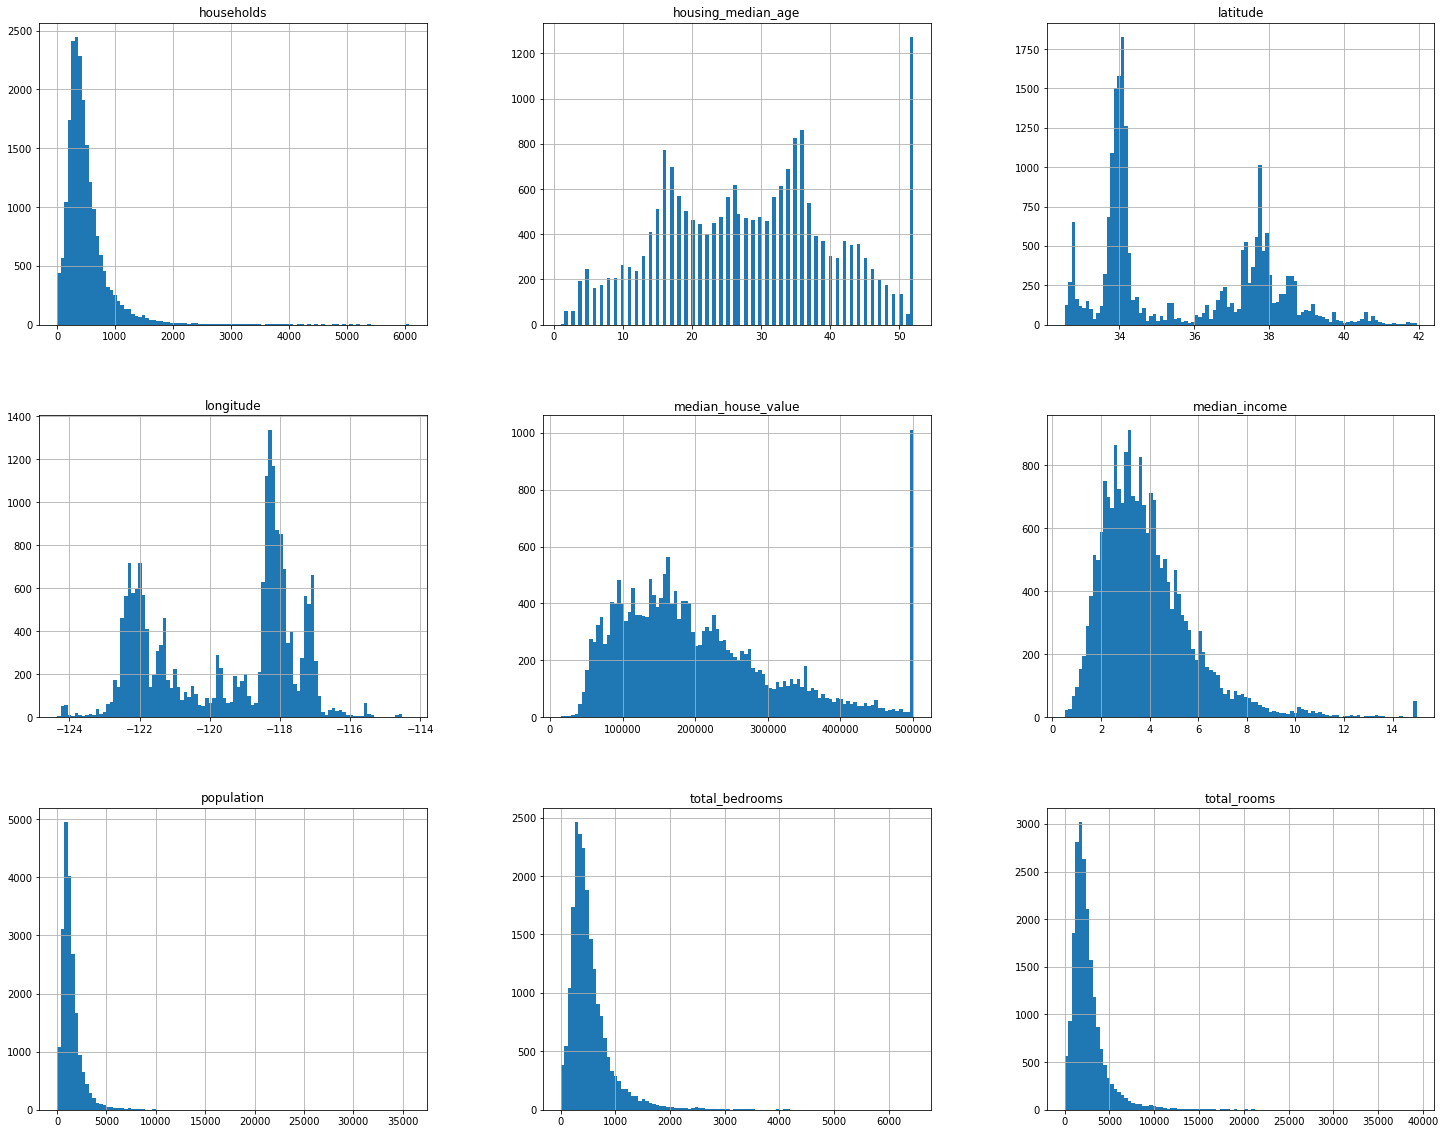

In [13]:
# lets plot a historgram for each numerical attribute 
# work only in jupyter
%matplotlib inline 
import matplotlib.pyplot as plt 
# here bin specify bucket or range
housing.hist (bins = 100, figsize = (25,20))


- housing_median_age and median_house_value are capped 
- Seriously ?? our target feature (i.e. median_house_value)  is capped ??
 Now what :
 - client also want higer value capped .. its fine then
 - client wants precise value .. hmm then we need to eliminate capped value or find correct value 
 

#### Lets create test set 

In [16]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size= 0.2, random_state=42)

 - Previous split does not ensure equi sampling 
 - suppose there is strong relation b/w median_income and median_house price
 - You want to ensue proper distribution of median_income in test set 
 Steps 
 1. Create a income category 
 2. most median_income is in the range 2-5 ,some are beyond 6 , some 15 
 
 
 

In [19]:
# lets crete incom category
import numpy as np
housing["income_cat"]= np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where( housing["income_cat"] < 5, 5.0, inplace = True)

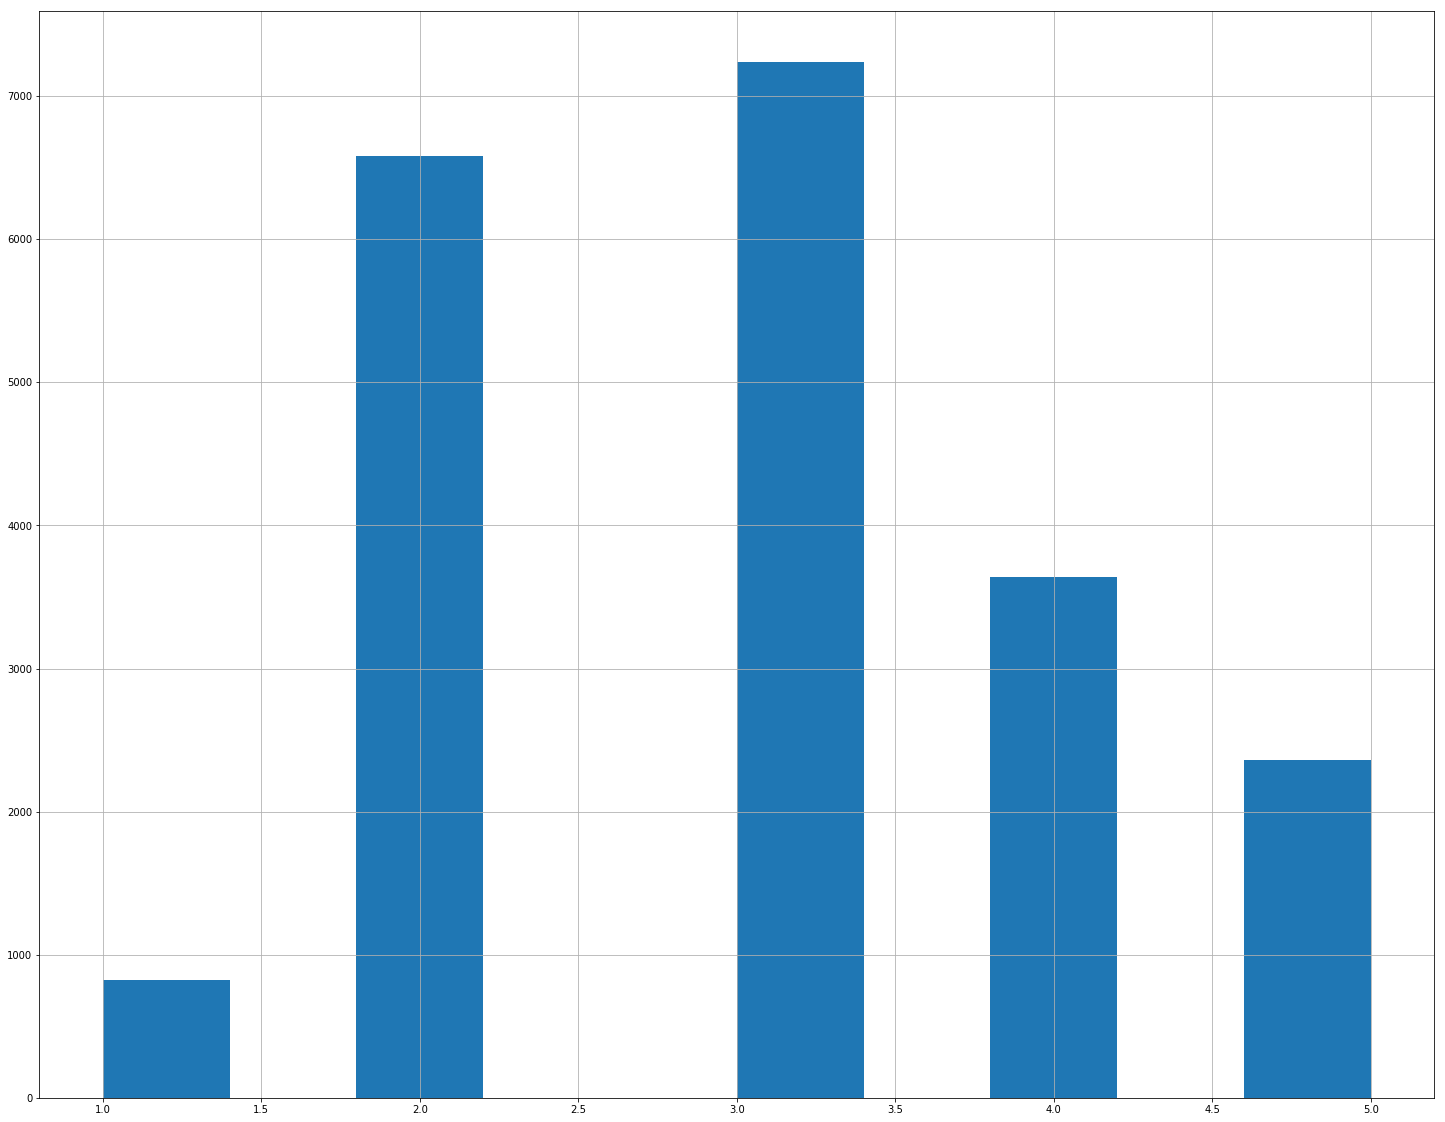

In [21]:
housing["income_cat"].hist (bins = 10, figsize = (25,20))

In [22]:
# lets do stratified sampling based on income category
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit (n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split( housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [23]:
# lets compare full dataset ,testset and train set 
strat_train_set["income_cat"].value_counts()/len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [24]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [25]:
housing["income_cat"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [26]:
# lets delete income_cat attribute 
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat",axis=1, inplace= True)

In [28]:
# lets copy trining set ,keep test set aside and play 
housing = strat_train_set.copy()

### Visualize Geographical Data

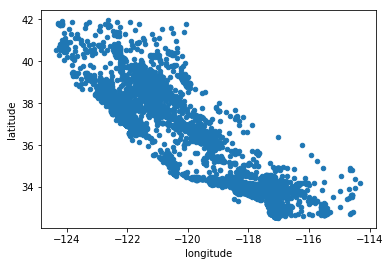

In [29]:
housing.plot(kind="scatter", x ="longitude",y="latitude")

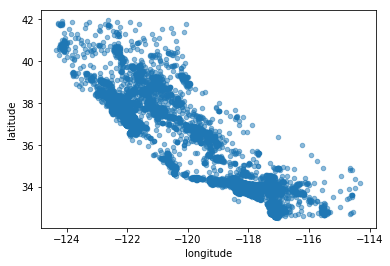

In [30]:
# seems by default alpha is 1 , alpha denotes density b
housing.plot(kind="scatter", x ="longitude",y="latitude", alpha = 0.5)

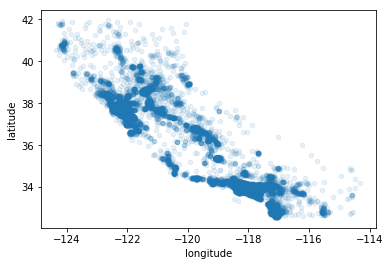

In [31]:
housing.plot(kind="scatter", x ="longitude",y="latitude", alpha = 0.1)

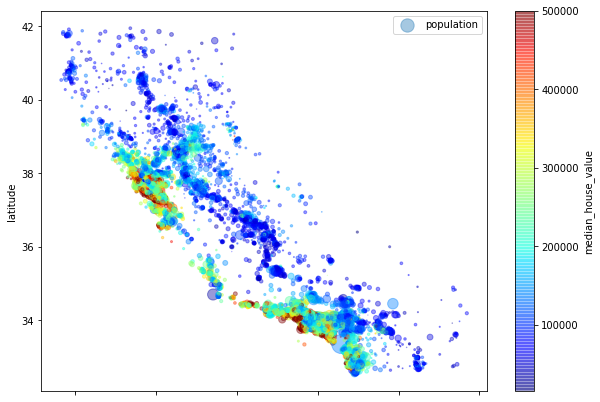

In [34]:
housing.plot(kind="scatter", x ="longitude",y="latitude", alpha =0.4, s=housing["population"]/100, 
              label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,)

- Above image tells housing prices are related to lacation (close to ocean) and to the population density
- Clustering  algorithm will also be usefull in this case 

###  Look for Correlation 

In [35]:
#lets check linear correlation (Pearsons coefficient)
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

###### co-related coefficent is b/w -1 to 1
- 1 is higly correlate
- 0 is no effect
- 1 is negatively( inversly)  related 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ff138d0>,
      dtype=object)

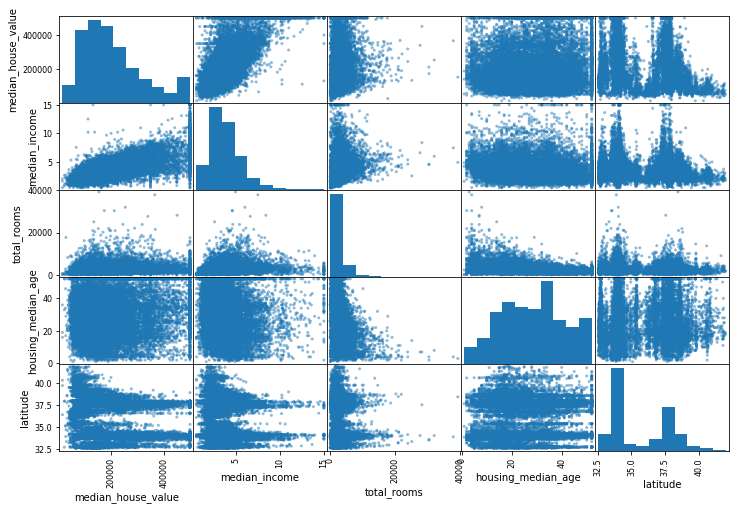

In [39]:
# another way to check corellation using scateered plot using pandas 
# but we will do for slected fetures from Pearsons coefficient

from pandas.tools.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age", "latitude"]
scatter_matrix (housing[attributes], figsize=(12,8))

Notable points from above graphs
- Strong correlation b/w median _house_value and median_income

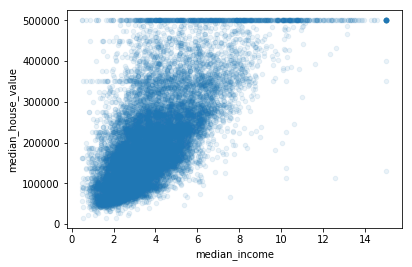

In [43]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha = 0.09)

Now going into depth horizontal line (cap) is not only at 500k it is at 350K, 450K and may be at 220K and 280 K

### Experimenting with Attribute Combinations 

- Tail heavy distribution can be tranform such as logarithmic transformation
- Try out other variable combination like rooms_per_household, bedrooms_per_household, population_per_houshold 



In [46]:
housing["rooms_per_houshold"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_houshold"] = housing["total_bedrooms"]/housing["households"]
housing["population_per_houshold"] = housing["population"]/housing["households"]
housing["bedrooms_per_rooms"] = housing["total_bedrooms"]/housing["total_rooms"]



In [47]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value         1.000000
median_income              0.687160
rooms_per_houshold         0.146285
total_rooms                0.135097
housing_median_age         0.114110
households                 0.064506
total_bedrooms             0.047689
population_per_houshold   -0.021985
population                -0.026920
bedrooms_per_houshold     -0.043343
longitude                 -0.047432
latitude                  -0.142724
bedrooms_per_rooms        -0.259984
Name: median_house_value, dtype: float64

 Not bad ! bedrooms_per_rooms is much more co-related

### Step 4. Prepare the Data

In [48]:
# lets separate the predictors and labels
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [50]:
# using scikitlern imputer  calss for missing value
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = "median")
# since median strategy is for numerical attributes we need to remove non numerical attributes 
housing_num = housing.drop("ocean_proximity", axis =1)
#fit the imputer instance to the training data using fit() method 
imputer.fit(housing_num)


Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [53]:
#replace missing values by this trained imputer 
X = imputer.transform(housing_num)


In [55]:
# putting this result(numpy array) to pandas dataframe
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

###  Handling Text and Categorical Attributes

### Step 5. Short List Promising Model

### Step 6. Fine-Tune the System

### Step 7. Present Your Solution

### Step 8. Launch